<a href="https://colab.research.google.com/github/michpil19/ML_emotion_detection_project_scripts/blob/master/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-06-03 15:37:01--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-06-03 15:37:01--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0fd6daf40eb958c950f81b9fa3.dl.dropboxusercontent.com/cd/0/inline/BmiODWeSgK-H5Ft6TqJZEWuIbtn8IJFkZMGs0GBLtwrZ5NeDAUwIhhAFien4zRtVcHCoVwM90PaE9hZagIvyxp98S9f_8oH4bGZ6bkfQAH9mAaLp6459RWodQjcMUgMS35iQXjjNHOCqBd-vN_yx_4OG6se4QILf62Ry1sFEHMGJmw/file# [following]
--2022-06-03 15:37:01--  https://uc0fd6daf40eb958c950f81b9fa3.dl.dropboxusercontent.com/cd/0/inline/BmiODWeSgK-H5Ft6TqJZEWuIbtn8IJFkZMGs0GBLtwrZ5NeDAUwIhhAFien4zRtVcH

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

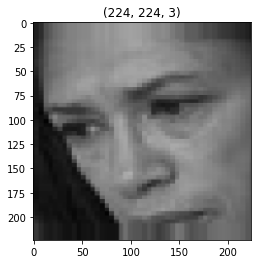

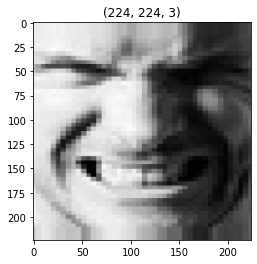

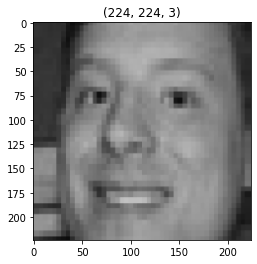

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 3:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.004 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model_test3.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 15, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 19.4463 - accuracy: 0.2042
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to best_model_test3.h5
15/15 [==============================] - 19s 402ms/step - loss: 19.4463 - accuracy: 0.2042 - val_loss: 12.3316 - val_accuracy: 0.3281
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 9.0411 - accuracy: 0.3250
Epoch 2: val_accuracy improved from 0.32812 to 0.39844, saving model to best_model_test3.h5
15/15 [==============================] - 6s 383ms/step - loss: 9.0411 - accuracy: 0.3250 - val_loss: 6.5027 - val_accuracy: 0.3984
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 6.5499 - accuracy: 0.3604
Epoch 3: val_accuracy did not improve from 0.39844
15/15 [==============================] - 5s 365ms/step - loss: 6.5499 - accuracy: 0.3604 - val_loss: 6.4015 - val_accuracy: 0.3008
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 4.9970 - accuracy: 0.

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model_test3.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

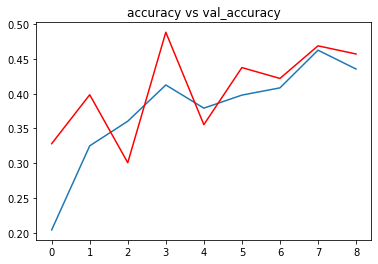

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("accuracy vs val_accuracy")
plt.show()

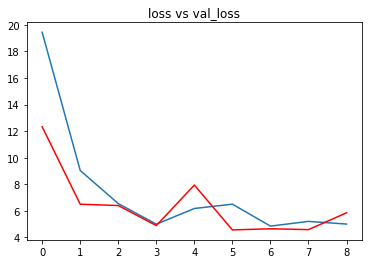

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Outputs for myDataBase from extracted_faces_gray

In [ ]:
# path for the image to see if it predics correct class
print("OUR_DATA")
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]
#path = "/content/test/happy/PrivateTest_95094.jpg"
#path = "/content/drive/MyDrive/ML_photos/hp48.jpg"
totalRightGuess = 0
totalWrongGuess = 0
for feeling in emotions:
  feelCorrect = 0
  feelWrong = 0
  for k in range(1,19):
    path = "/content/drive/MyDrive/extracted_faces_gray/extracted_faces_gray_" + feeling + "/image"+str(k)+".jpg"
    try:
      img = load_img(path, target_size=(224,224) )
      i = img_to_array(img)/255
      input_arr = np.array([i])
      input_arr.shape

      pred = np.argmax(model.predict(input_arr))

      # print("Label: " + feeling + " " + "image"+str(k)+".jpg")
      # print(f"Guess: {op[pred]}")
      if feeling.__eq__(op[pred]):
        #print("CORRECT")
        totalRightGuess+=1
        feelCorrect+=1
      else:
        #print("WRONG")
        totalWrongGuess+=1
        feelWrong+=1
    except FileNotFoundError:
      print("...")#print("no more files here i guess")
    
  print()
  print(feeling + " result: " + str(feelCorrect) +  "/" + str(feelWrong+feelCorrect) + " as fraction: " + str(round(feelCorrect /(feelCorrect+feelWrong), 2)))


print()
print("Accuracy: " + str(totalRightGuess) +  "/" + str(totalRightGuess+totalWrongGuess) + " as fraction: " +  str(round(totalRightGuess/(totalRightGuess+totalWrongGuess),2)))
print("Total number of guesses: " + str(totalRightGuess+totalWrongGuess))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()
  

OUR_DATA

angry result: 15/18 as fraction: 0.83

disgust result: 0/18 as fraction: 0.0
...

fear result: 0/17 as fraction: 0.0

happy result: 16/18 as fraction: 0.89
...

neutral result: 0/17 as fraction: 0.0
...
...
...

sad result: 1/15 as fraction: 0.07
...
...

surprise result: 3/16 as fraction: 0.19

Accuracy: 35/119 as fraction: 0.29
Total number of guesses: 119


#Outputs for normalisedData from stockPhotos

In [ ]:
# path for the image to see if it predics correct class
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]

totalRightGuess = 0
totalWrongGuess = 0
for feeling in emotions:
  feelCorrect = 0
  feelWrong = 0
  for m in range(1,10):
    path = "/content/drive/MyDrive/normalisedData/" + feeling + "/"+str(m)+".jpg"
    try:
      img = load_img(path, target_size=(224,224) )

      i = img_to_array(img)/255
      input_arr = np.array([i])
      input_arr.shape

      pred = np.argmax(model.predict(input_arr))

      #print("Label: " + feeling + " " + str(m)+".jpg")
      #print(f"Guess: {op[pred]}")
      if feeling.__eq__(op[pred]):
        #print("CORRECT")
        totalRightGuess+=1
        feelCorrect+=1
      else:
        #print("WRONG")
        totalWrongGuess+=1
        feelWrong+=1
    except FileNotFoundError:
      print("...")#print("no more files here i guess")

  print()
  print(feeling + " result: " + str(feelCorrect) +  "/" + str(feelWrong+feelCorrect) + " as fraction: " + str(round(feelCorrect /(feelCorrect+feelWrong), 2)))
print()
print("Accuracy: " + str(totalRightGuess) +  "/" + str(totalRightGuess+totalWrongGuess) + " as fraction: " +  str(round(totalRightGuess/(totalRightGuess+totalWrongGuess),2)))
print("Total number of guesses: " + str(totalRightGuess+totalWrongGuess))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()


angry result: 5/9 as fraction: 0.56

disgust result: 0/9 as fraction: 0.0
...
...

fear result: 0/7 as fraction: 0.0

happy result: 9/9 as fraction: 1.0

neutral result: 3/9 as fraction: 0.33
...
...

sad result: 4/7 as fraction: 0.57
...

surprise result: 6/8 as fraction: 0.75

Accuracy: 27/58 as fraction: 0.47
Total number of guesses: 58
